In [12]:
import pandas as pd

adv = pd.read_csv("Advertising.csv", index_col=0)
adv.head()

TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

In [13]:
import numpy as np

# Y is a response variable
Y = sales = adv["sales"]
# Anta att regrigtionen av TV på Sales är ungefär linjär
# Y = β0 + β1 X ( X = design matris)
# Sales = β0 + β1 x TV
# Modelspecifikationsmatrisenbehöver en 1:a i första kolumnen
X = TV = np.column_stack([np.ones(Y.shape[0]), adv["TV"]])
X

array([[  1. , 230.1],
       [  1. ,  44.5],
       [  1. ,  17.2],
       [  1. , 151.5],
       [  1. , 180.8],
       [  1. ,   8.7],
       [  1. ,  57.5],
       [  1. , 120.2],
       [  1. ,   8.6],
       [  1. , 199.8],
       [  1. ,  66.1],
       [  1. , 214.7],
       [  1. ,  23.8],
       [  1. ,  97.5],
       [  1. , 204.1],
       [  1. , 195.4],
       [  1. ,  67.8],
       [  1. , 281.4],
       [  1. ,  69.2],
       [  1. , 147.3],
       [  1. , 218.4],
       [  1. , 237.4],
       [  1. ,  13.2],
       [  1. , 228.3],
       [  1. ,  62.3],
       [  1. , 262.9],
       [  1. , 142.9],
       [  1. , 240.1],
       [  1. , 248.8],
       [  1. ,  70.6],
       [  1. , 292.9],
       [  1. , 112.9],
       [  1. ,  97.2],
       [  1. , 265.6],
       [  1. ,  95.7],
       [  1. , 290.7],
       [  1. , 266.9],
       [  1. ,  74.7],
       [  1. ,  43.1],
       [  1. , 228. ],
       [  1. , 202.5],
       [  1. , 177. ],
       [  1. , 293.6],
       [  1

$$
\hat{\beta} = b - (X^TX)^{-1}X^Ty
$$



In [14]:
# pseudo-invers för prestanda
b = np.linalg.pinv(X.T @ X) @ X.T @ Y
b

array([7.03259355, 0.04753664])

Efter regressionen får vi en skattare för ( y ):

$$
\hat{y} = \beta_0 + \beta_1x
$$

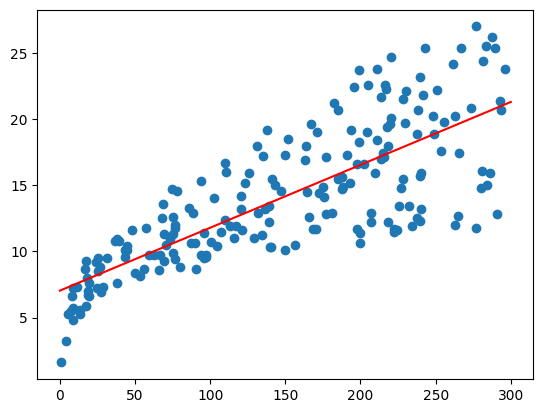

In [15]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 1], Y)
x = np.linspace(0, 300)
y_hat = b[0] + b[1]*x
plt.plot(x, y_hat, c="red")

SSE = (y1 - )

In [17]:
# RSS Residual Sum of Square
# SSE Sum of Square Error
# Samma sak

#stickprovets storlek
n = Y.shape[0]
# antalet parametrar, bara TV i detta fallet, så 1
v = X.shape[1] - 1

SSE = np.sum(np.square(Y - (X @ b)))
# Om kovariancen oberonde så är linjära kovariancen 0

2102.5305831313512

$\texttt{CoV}(X, Y) = E[(X-\mu_X)(Y-\mu_Y)] = E[XY] - E[X] E[Y]$

$S_{xy} \rightarrow (X-\mu_X)(Y-\mu_Y)$

Om X och Y är oberoende så är Cov(X,Y) = 0, men vi kan inte anta det omvända. Dvs Cov = 0 inte nödvämdigtvis att X och Y är oberonde, men de är åtminstånde inte linjärt beronde. 

Cov visar bar om de rör sig åt samma håll...

En starkare egenskap är korrelation (Pearson coefficient of correlation), som är ett värde mellan -1 och 1 (inkl ändpunkterna). 

Låt $X$ $Y$ vara slumpvaiabler med medel $\mu_Y$ respektive $\mu_Y$ samt varianser $\sigma_x^2$ och $\sigma_x^2$. 
Korrelationen mellan $X$ $Y$ ges då av:

\begin{equation*}
\rho_{XY} = \frac{\texttt{Cov(X, Y)}}{\sqrt{(\texttt{Var} X) (\texttt{Var} Y)}}
\end{equation*}

Om Pearsoncofficienten är 1 eller -1 ($|\rho_{XY}| = 1$) då har vi visat att det finns en ekvation: $Y = \beta_0 + \beta_1X$

Standardfel (kring medlet)

$$\frac{\sigma^2}{n}$$

In [21]:
var = SSE/(n-v-1)
S = np.sqrt(var) # residual standard error, alltså en uppskattning av standardfelet/ stickprovsavvikelsen
S
# Sum of squares Regression
SSR = np.sum(b*(X.T @ Y)) - (np.square(np.sum(Y))/n) # riktiga värdet 
Syy = np.sum(np.square(Y)) - (np.square(np.sum(Y))/n) # uppskattninging av standardfelet
Sxx = np.sum(np.square(X)) - (np.square(np.sum(X))/n)

# standard error (of the mean)
se = var / n

# square of Standard error of Beta1 = vae/Sxx
se_b = var/Sxx

ci = (b[1], 2*np.sqrt(se_b))
print(f"Confidence interval on predictor beta1: {ci[0]:.4f} +/- {ci[1]:.4f}")

Confidence interval on predictor beta1: 0.0475 +/- 0.0055


Detta är väldigt ungifärligt ett 95% interval (2sigma). Om vi kör regrissionen många gånger på delmängder av datan (som skall ha samma medel, dvs vara balanserade) så väntar vi oss att 95% av värderna hamnar mellan 0.052 och 0.042. 

In [28]:
x_mean = np.mean(X[:,1])
se_intercept = var *(1/n * (np.square(x_mean)/(np.square(np.sum(X-x_mean)))))
se_intercept

1.3455950562889917e-06

In [25]:
# borde bli [6.130, 7.935]
b[0]

7.03259354913008

### Hypotestning
Noll-hypotes:
$H_0$: There is no relationship between X and Y.

Alternative hypotes:

$H_a$: There is relationship between X and Y.

$H_0$: $\beta 1 = 0 $

$H_a$: $\beta_1 \neq 0 $

T-statistiska för att testa relevans
$$
t = \frac{\hat{\beta}_1 - \mathbb{0}}{SE({\hat{\beta_1}})}
$$

In [29]:
t = b[1]/se_b
t # p värde

6303.106346187029

ok, regrissionen är relevant men hur bra är den?

$$\hat{\rho} = r = \frac{S_{xy}}{\sqrt{S_{xx}S_{yy}}}$$

In [ ]:
kap 3
3,62
övn 8,9,10,11